In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence  import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Embedding
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import root_mean_squared_error

In [2]:
import warnings
warnings.filterwarnings("ignore")


In [3]:
df =pd.read_csv("monthly milk production.csv",index_col="Date",parse_dates=True)

In [4]:
df.head()

Production
Date                  
1962-01-01         589
1962-02-01         561
1962-03-01         640
1962-04-01         656
1962-05-01         727

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 1962-01-01 to 1975-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Production  168 non-null    int64
dtypes: int64(1)
memory usage: 2.6 KB


In [6]:
df.loc["1968"]

Production
Date                  
1968-01-01         717
1968-02-01         696
1968-03-01         775
1968-04-01         796
1968-05-01         858
1968-06-01         826
1968-07-01         783
1968-08-01         740
1968-09-01         701
1968-10-01         706
1968-11-01         677
1968-12-01         711

In [7]:
df.loc["1968"].mean()

Production    748.833333
dtype: float64

In [8]:
df.loc["1970-04":"1972-08"]

Production
Date                  
1970-04-01         824
1970-05-01         886
1970-06-01         859
1970-07-01         819
1970-08-01         783
1970-09-01         740
1970-10-01         747
1970-11-01         711
1970-12-01         751
1971-01-01         804
1971-02-01         756
1971-03-01         860
1971-04-01         878
1971-05-01         942
1971-06-01         913
1971-07-01         869
1971-08-01         834
1971-09-01         790
1971-10-01         800
1971-11-01         763
1971-12-01         800
1972-01-01         826
1972-02-01         799
1972-03-01         890
1972-04-01         900
1972-05-01         961
1972-06-01         935
1972-07-01         894
1972-08-01         855

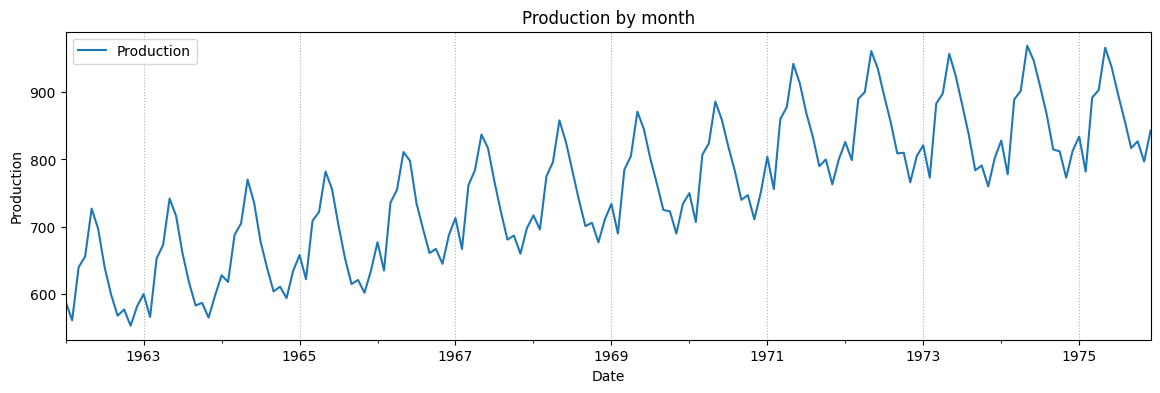

In [9]:
df.plot(figsize=(14,4),title="Production by month",ylabel="Production")
plt.grid(axis="x",ls=":")

In [10]:
result =seasonal_decompose(df)

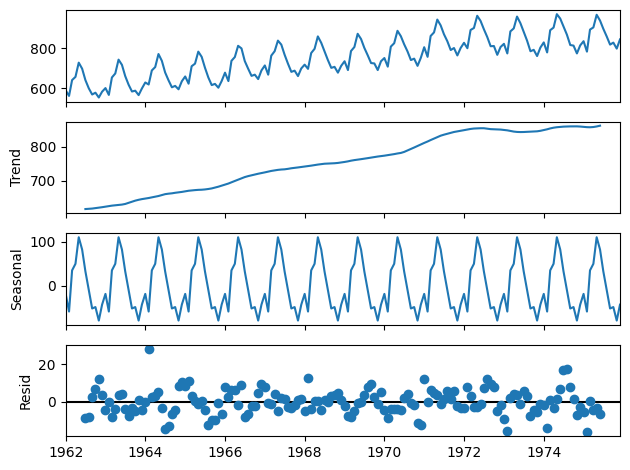

In [11]:
result.plot();

In [12]:
train =df.iloc[:len(df)-12]
test =df.iloc[len(df)-12:]

In [13]:
train

Production
Date                  
1962-01-01         589
1962-02-01         561
1962-03-01         640
1962-04-01         656
1962-05-01         727
...                ...
1974-08-01         867
1974-09-01         815
1974-10-01         812
1974-11-01         773
1974-12-01         813

[156 rows x 1 columns]

In [14]:
test

Production
Date                  
1975-01-01         834
1975-02-01         782
1975-03-01         892
1975-04-01         903
1975-05-01         966
1975-06-01         937
1975-07-01         896
1975-08-01         858
1975-09-01         817
1975-10-01         827
1975-11-01         797
1975-12-01         843

In [15]:
scaler= MinMaxScaler()

In [16]:
scaler.fit(train)

MinMaxScaler()

In [17]:
scaled_train =scaler.transform(train)
scaled_test =scaler.transform(test)

In [18]:
generator =TimeseriesGenerator(scaled_train ,scaled_train ,length=12,batch_size=1)

In [19]:
inp,out =generator[0]

In [20]:
inp

array([[[0.08653846],
        [0.01923077],
        [0.20913462],
        [0.24759615],
        [0.41826923],
        [0.34615385],
        [0.20913462],
        [0.11057692],
        [0.03605769],
        [0.05769231],
        [0.        ],
        [0.06971154]]])

In [21]:
out

array([[0.11298077]])

In [22]:
inp2,out2 =generator[1]

In [23]:
inp2

array([[[0.01923077],
        [0.20913462],
        [0.24759615],
        [0.41826923],
        [0.34615385],
        [0.20913462],
        [0.11057692],
        [0.03605769],
        [0.05769231],
        [0.        ],
        [0.06971154],
        [0.11298077]]])

In [24]:
out2

array([[0.03125]])

In [25]:
inp.shape

(1, 12, 1)

In [26]:
out.shape

(1, 1)

In [28]:
model = Sequential([
    LSTM(2000,activation="relu",input_shape=((12,1))),
    Dense(1)
])

In [29]:
model.compile(optimizer="adam",loss="mse")

In [30]:
model.fit(generator,epochs=30)

Epoch 1/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 77s 489ms/step - loss: 0.0677
Epoch 2/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 85s 589ms/step - loss: 0.0128
Epoch 3/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 75s 520ms/step - loss: 0.0057
Epoch 4/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 80s 553ms/step - loss: 0.0075
Epoch 5/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 80s 552ms/step - loss: 0.0028
Epoch 6/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 84s 584ms/step - loss: 0.0030
Epoch 7/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 77s 532ms/step - loss: 0.0028
Epoch 8/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 87s 602ms/step - loss: 0.0033
Epoch 9/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 93s 642ms/step - loss: 0.0038
Epoch 10/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 82s 568ms/step - loss: 0.0033
Epoch 11/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 89s 618ms/step - loss: 0.0026
Epoch 12/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 81s 562ms/step - loss: 0.0024
Epoch 13/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 74s 512ms/step - loss: 0.0023
Epoch 14/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 69s 480ms/step - loss: 0.0019
Epoch 15/30
144

In [31]:
last_train_batch = scaled_train[-12:]
last_train_batch

array([[0.66105769],
       [0.54086538],
       [0.80769231],
       [0.83894231],
       [1.        ],
       [0.94711538],
       [0.85336538],
       [0.75480769],
       [0.62980769],
       [0.62259615],
       [0.52884615],
       [0.625     ]])

In [32]:
last_train_batch =last_train_batch.reshape((1,12,1))

In [33]:
last_train_batch

array([[[0.66105769],
        [0.54086538],
        [0.80769231],
        [0.83894231],
        [1.        ],
        [0.94711538],
        [0.85336538],
        [0.75480769],
        [0.62980769],
        [0.62259615],
        [0.52884615],
        [0.625     ]]])

In [34]:
model.predict(last_train_batch)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step


array([0.68511015], dtype=float32)

In [35]:
scaled_test[0]

array([0.67548077])

In [36]:
test_pred = []

In [37]:
first_eval_batch = scaled_train[-12:]
current_batch = first_eval_batch.reshape((1,12,1))

In [38]:
for i in range(len(test)):
    current_pred =model.predict(current_batch)[0]

    test_pred.append(current_pred)

    current_batch =np.append(current_batch[:,:1,:],[[current_pred]],axis=1)
  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


In [39]:
test_pred

[array([0.68511015], dtype=float32),
 array([0.7336124], dtype=float32),
 array([0.73836386], dtype=float32),
 array([0.7388323], dtype=float32),
 array([0.73887825], dtype=float32),
 array([0.7388828], dtype=float32),
 array([0.73888326], dtype=float32),
 array([0.7388834], dtype=float32),
 array([0.7388834], dtype=float32),
 array([0.7388834], dtype=float32),
 array([0.7388834], dtype=float32),
 array([0.7388834], dtype=float32)]

In [40]:
test

Production
Date                  
1975-01-01         834
1975-02-01         782
1975-03-01         892
1975-04-01         903
1975-05-01         966
1975-06-01         937
1975-07-01         896
1975-08-01         858
1975-09-01         817
1975-10-01         827
1975-11-01         797
1975-12-01         843

In [41]:
true_pred =scaler.inverse_transform(test_pred)

In [42]:
true_pred

array([[838.00582314],
       [858.18276596],
       [860.15936661],
       [860.3542347 ],
       [860.37335205],
       [860.37523651],
       [860.37543488],
       [860.37548447],
       [860.37548447],
       [860.37548447],
       [860.37548447],
       [860.37548447]])

In [43]:
test["Prediction"] = true_pred

In [44]:
test

Production  Prediction
Date                              
1975-01-01         834  838.005823
1975-02-01         782  858.182766
1975-03-01         892  860.159367
1975-04-01         903  860.354235
1975-05-01         966  860.373352
1975-06-01         937  860.375237
1975-07-01         896  860.375435
1975-08-01         858  860.375484
1975-09-01         817  860.375484
1975-10-01         827  860.375484
1975-11-01         797  860.375484
1975-12-01         843  860.375484

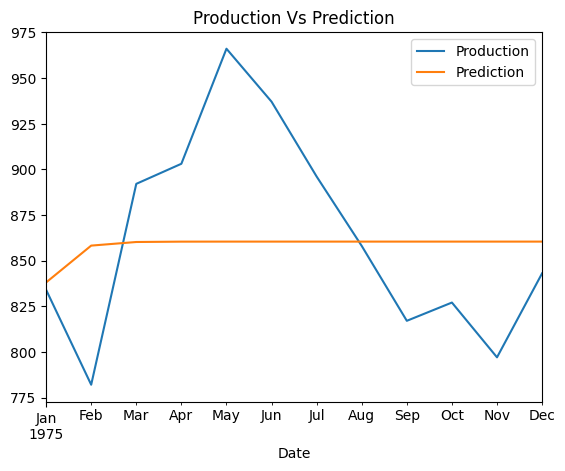

In [45]:
test.plot(title="Production Vs Prediction")
plt.show()

In [54]:
rmse=root_mean_squared_error(test["Production"],test["Prediction"])

In [55]:
test.mean()

Production    862.666667
Prediction    858.308636
dtype: float64

In [56]:
lower =test["Production"].mean()-rmse
upper =test["Prediction"].mean()+rmse

In [57]:
lower,upper

(np.float64(809.2273252808384), np.float64(911.7479777332812))